In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def find_cat_num_cols(df):
    cat_cols = []
    num_cols = []
    for col in df.columns:
        if df[col].dtype == object:
            cat_cols.append(col)
        else:
            num_cols.append(col)
    return cat_cols, num_cols


## NYT articles from 2020

Only contains abstracts, need full articles I think

In [4]:
df = pd.read_csv("nyt-articles-2020.csv")

df.head()


,newsdesk,section,subsection,material,headline,abstract,keywords,word_count,pub_date,n_comments,uniqueID
0,Editorial,Opinion,NaN,Editorial,Protect Veterans From Fraud,Congress could do much more to protect America...,"['Veterans', 'For-Profit Schools', 'Financial ...",680,2020-01-01 00:18:54+00:00,186,nyt://article/69a7090b-9f36-569e-b5ab-b0ba5bb3...
1,Games,Crosswords & Games,NaN,News,‘It’s Green and Slimy’,Christina Iverson and Jeff Chen ring in the Ne...,['Crossword Puzzles'],931,2020-01-01 03:00:10+00:00,257,nyt://article/9edddb54-0aa3-5835-a833-d311a76f...
2,Science,Science,NaN,News,Meteor Showers in 2020 That Will Light Up Nigh...,"All year long, Earth passes through streams of...","['Meteors and Meteorites', 'Space and Astronom...",1057,2020-01-01 05:00:08+00:00,6,nyt://article/04bc90f0-b20b-511c-b5bb-3ce13194...
3,Science,Science,NaN,Interactive Feature,Sync your calendar with the solar system,"Never miss an eclipse, a meteor shower, a rock...","['Space and Astronomy', 'Moon', 'Eclipses', 'S...",0,2020-01-01 05:00:12+00:00,2,nyt://interactive/5b58d876-9351-50af-9b41-a312...
4,Science,Science,NaN,News,"Rocket Launches, Trips to Mars and More 2020 S...",A year full of highs and lows in space just en...,"['Space and Astronomy', 'Private Spaceflight',...",1156,2020-01-01 05:02:38+00:00,25,nyt://article/bd8647b3-8ec6-50aa-95cf-2b81ed12...


In [7]:
cat_cols, num_cols = find_cat_num_cols(df)
print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)


Categorical columns: ['newsdesk', 'section', 'subsection', 'material', 'headline', 'abstract', 'keywords', 'pub_date', 'uniqueID']
Numerical columns: ['word_count', 'n_comments']


In [ ]:
# Loop through each categorical column and create a bar plot
for col in cat_cols:
    fig, ax = plt.subplots()
    value_counts = df[col].value_counts().nlargest(10)
    value_counts.plot.bar(ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Categories')
    ax.set_ylabel('Frequency')
    plt.show()

## NYT Articles over 100 years

In [3]:
df = pd.read_parquet('nyt_data.parquet')

In [13]:
df.head()




,year,title,excerpt
0,1920,At last the Federal Reserve Board has issued r...,
1,1920,WILL TEST DOOR SERVICE.,Service Board to Further Examine I.R.T. Safety...
2,1920,Sanction for Chinese Contracts.,
3,1920,"LEADS FRAZIER BY 4,496.",Langer's Margin Falls in North Dakota--Gronna ...
4,1920,"CHICAGO, April 30.--With 300 suspicious charac...",Federal Agents and Police Round-- up Suspiciou...


## Medium articles

In [4]:
med_df = pd.read_csv("medium_articles.csv")

med_df.head()

,title,text,url,authors,timestamp,tags
0,Mental Note Vol. 24,Photo by Josh Riemer on Unsplash\n\nMerry Chri...,https://medium.com/invisible-illness/mental-no...,['Ryan Fan'],2020-12-26 03:38:10.479000+00:00,"['Mental Health', 'Health', 'Psychology', 'Sci..."
1,Your Brain On Coronavirus,Your Brain On Coronavirus\n\nA guide to the cu...,https://medium.com/age-of-awareness/how-the-pa...,['Simon Spichak'],2020-09-23 22:10:17.126000+00:00,"['Mental Health', 'Coronavirus', 'Science', 'P..."
2,Mind Your Nose,Mind Your Nose\n\nHow smell training can chang...,https://medium.com/neodotlife/mind-your-nose-f...,[],2020-10-10 20:17:37.132000+00:00,"['Biotechnology', 'Neuroscience', 'Brain', 'We..."
3,The 4 Purposes of Dreams,Passionate about the synergy between science a...,https://medium.com/science-for-real/the-4-purp...,['Eshan Samaranayake'],2020-12-21 16:05:19.524000+00:00,"['Health', 'Neuroscience', 'Mental Health', 'P..."
4,Surviving a Rod Through the Head,"You’ve heard of him, haven’t you? Phineas Gage...",https://medium.com/live-your-life-on-purpose/s...,['Rishav Sinha'],2020-02-26 00:01:01.576000+00:00,"['Brain', 'Health', 'Development', 'Psychology..."


In [5]:
cat_cols, num_cols = find_cat_num_cols(med_df)
print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)

# type(med_df['tags'][1])


Categorical columns: ['title', 'text', 'url', 'authors', 'timestamp', 'tags']
Numerical columns: []


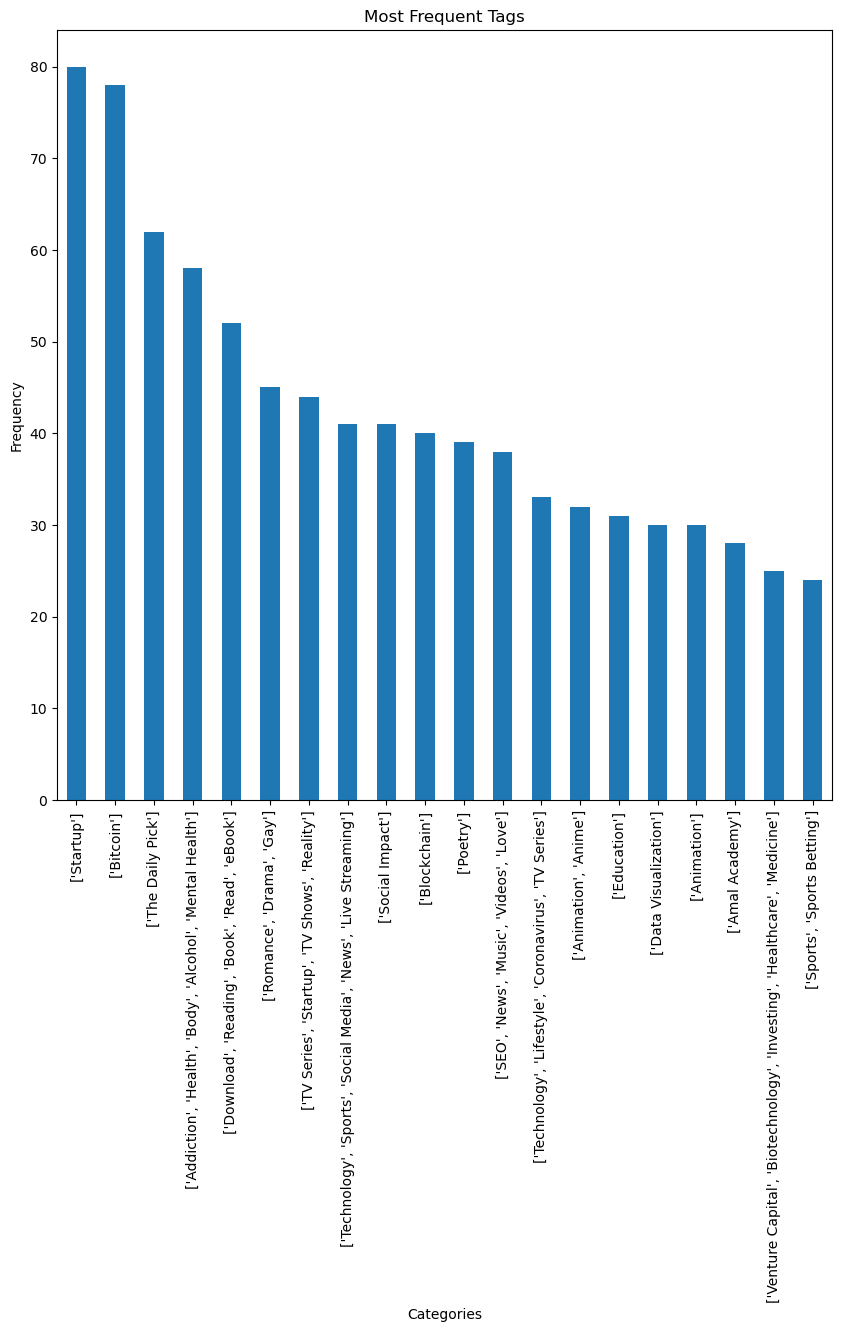

In [9]:
# Loop through each categorical column and create a bar plot
# for col in cat_cols:
fig, ax = plt.subplots(figsize = (10,10))
value_counts = med_df['tags'].value_counts().nlargest(20)
value_counts.plot.bar(ax=ax)
ax.set_title('Most Frequent Tags')
ax.set_xlabel('Categories')
ax.set_ylabel('Frequency')
plt.show()